Project Phase 1

Group 12: Arnav Goel, Abhishek Mohan Patil

The dataset I will be working with is the "Car details from Cardekho" dataset, which can be found on Kaggle at https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho. This dataset contains information on used cars listed on CarDekho.com, a popular Indian car buying and selling website.

The dataset contains 8 columns:

Car_Name: the name of the car

Year: the year the car was manufactured

Selling_Price: the price at which the car is being sold

Present_Price: the current showroom price of the car

Kms_Driven: the distance traveled by the car in kilometers

Fuel_Type: the fuel type of the car (Petrol, Diesel, or CNG)

Seller_Type: whether the seller is a dealer or an individual

Transmission: whether the car has a manual or automatic transmission

We'll be training our model to predict the "Car Price" with these factors.

First, let's import the necessary libraries and load the dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cars = pd.read_csv('C:/Users/styli/Downloads/cars prediction/car data.csv')


In [8]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
cars.shape


(301, 9)

In [10]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [42]:
print(cars.isnull().sum())

Year                      0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64


In [12]:
#Car_Name

cars.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [ ]:
#Car_Name contains 98 different values so it is better to drop this column

In [13]:
cars.drop(['Car_Name'],axis=1,inplace = True)

In [14]:
cars.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#    EDA

In [ ]:
# Let's look at the distributions of the numerical columns:

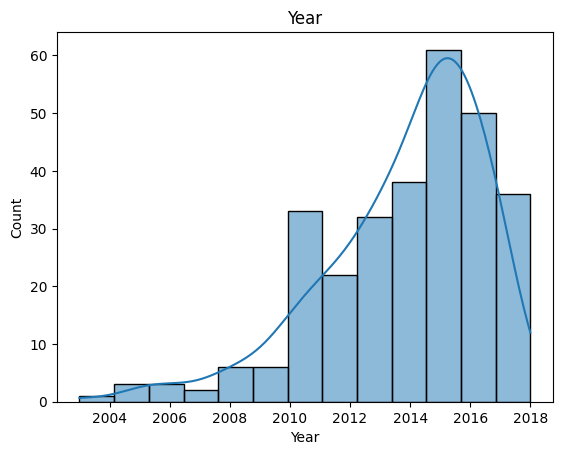

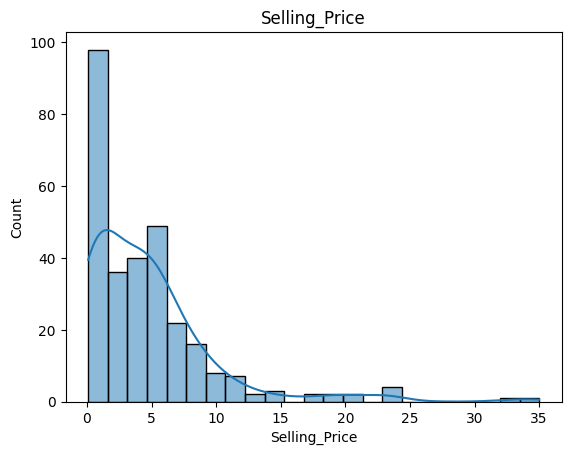

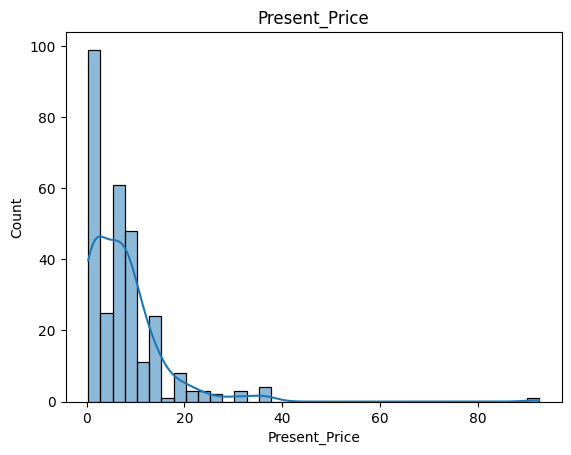

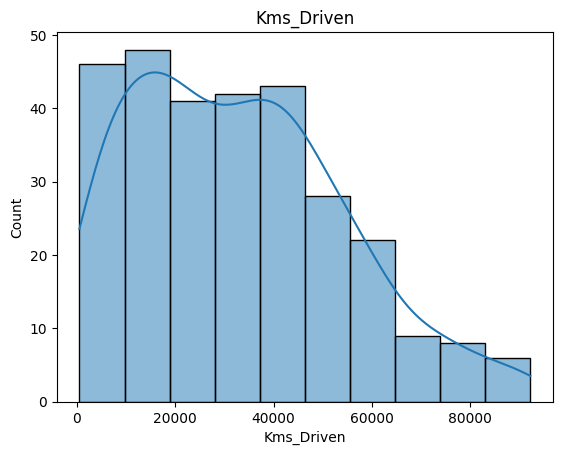

In [40]:
num_cols = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']
for col in num_cols:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)
    plt.show()

In [ ]:
#We can see that the Year column is slightly right-skewed, while the Selling_Price, Present_Price, and Kms_Driven columns are highly right-skewed. There also appears to be some outliers in the Selling_Price and Present_Price columns.

#Next, let's look at the categorical columns:

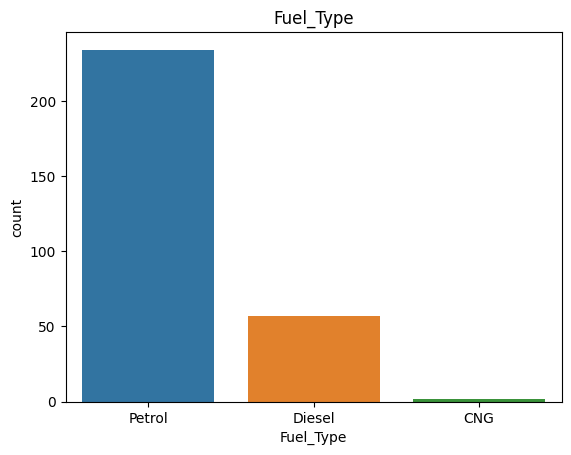

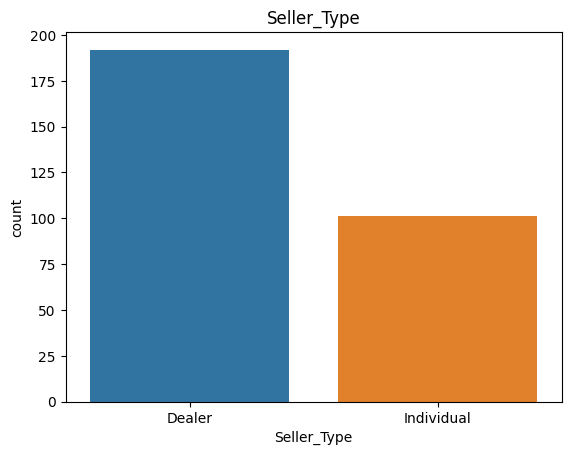

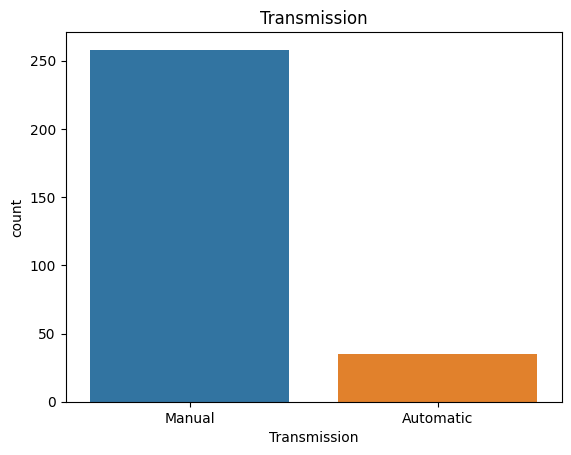

In [43]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
for col in cat_cols:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.show()

#  UNIVARIATE ANALYSIS

In [ ]:
# from the boxplot we can see that kms_Driven has outliers

In [16]:
q1 = cars['Kms_Driven'].quantile(0.25)
q3 = cars['Kms_Driven'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print(iqr,UL,LL)

33767.0 99417.5 -35650.5


In [17]:
cars[cars['Kms_Driven']>UL]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
179,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [18]:
cars[cars['Kms_Driven']>UL].count()['Kms_Driven']

8

In [ ]:
# These 8 values are greater than the upper limit value 99417.5

 #We would remove these values

In [19]:
#outlier removal from Kms_Driven

df = cars[cars['Kms_Driven']<UL]
cars=df
cars

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


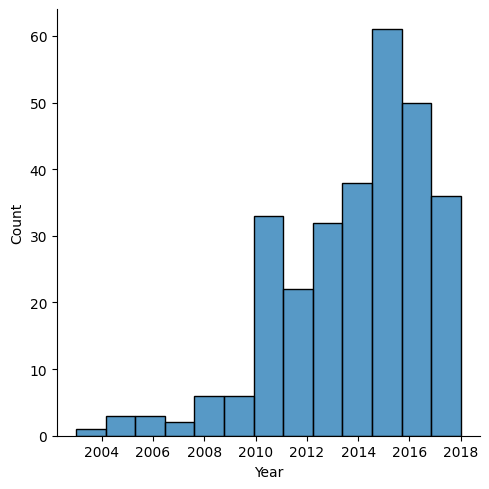

In [23]:
sns.displot(df['Year'])

In [ ]:
# # The Years variable is left skewed

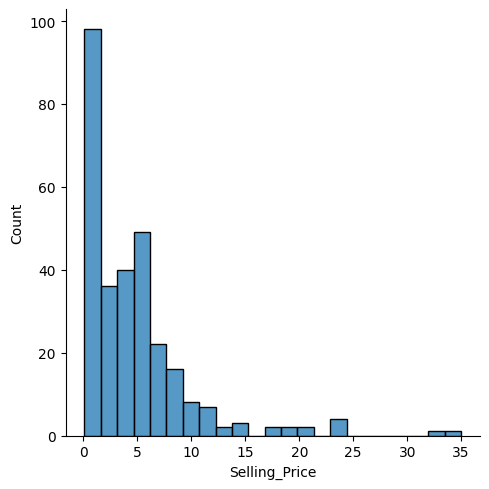

In [22]:
sns.displot(df['Selling_Price'])
plt.show()

In [ ]:
# the selling price is right skewed

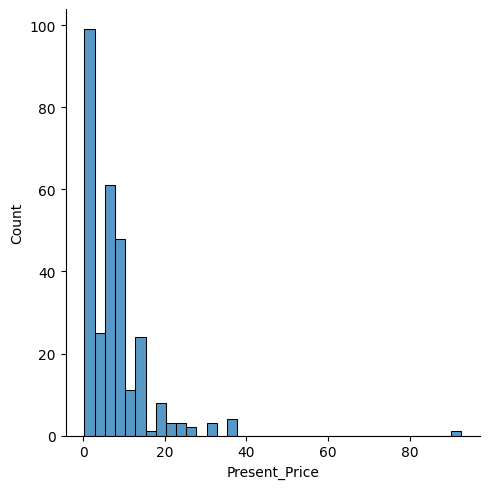

In [24]:
sns.displot(df['Present_Price'])
plt.show()

In [ ]:
#the present_price is right skewed

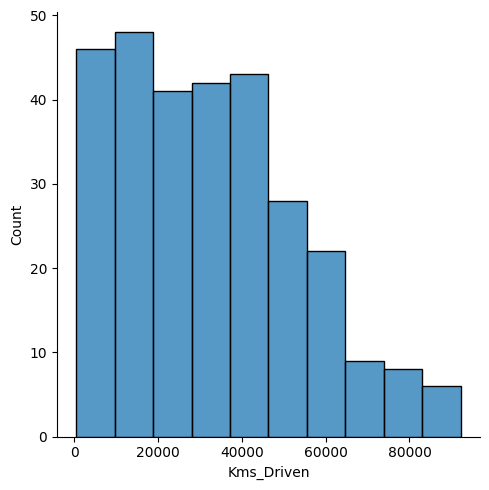

In [25]:
sns.displot(df['Kms_Driven'])
plt.show()

In [ ]:
The Kms_Driven are almost normally distributed after removing the outliers, the max values lie between 20000 to 50000
#kms

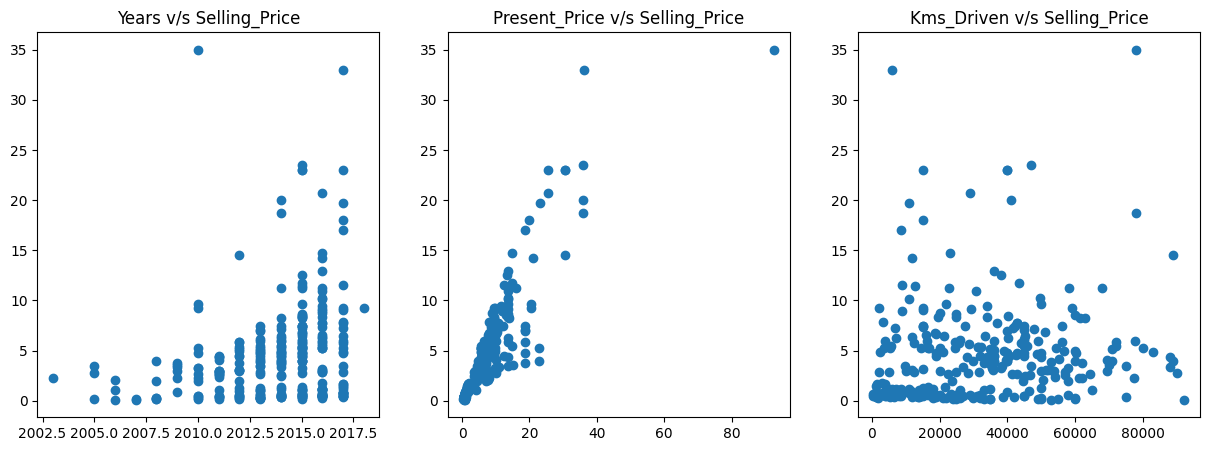

In [28]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize = (15,5))

#scatter plot 1
ax1.scatter(x=cars['Year'],y= cars['Selling_Price'])
ax1.set_title('Years v/s Selling_Price')

#scatter plot 2
ax2.scatter(x=cars['Present_Price'], y=cars['Selling_Price']) 
ax2.set_title('Present_Price v/s Selling_Price')

#scatter plot 3
ax3.scatter(x=cars['Kms_Driven'],y=cars['Selling_Price'])
ax3.set_title('Kms_Driven v/s Selling_Price')

plt.draw()  

In [ ]:
# 1The older the car the lesser the selling price
#2 The selling price of those cars is greater whose current ex-showroom price(present_price) is greater i.e the present_price and sellin_price is directly proportional.
#3 As the Km_Driven increases the Selling_price of the car decreases

Text(0.5, 1.0, 'Seller_Type v/s Selling_Price')

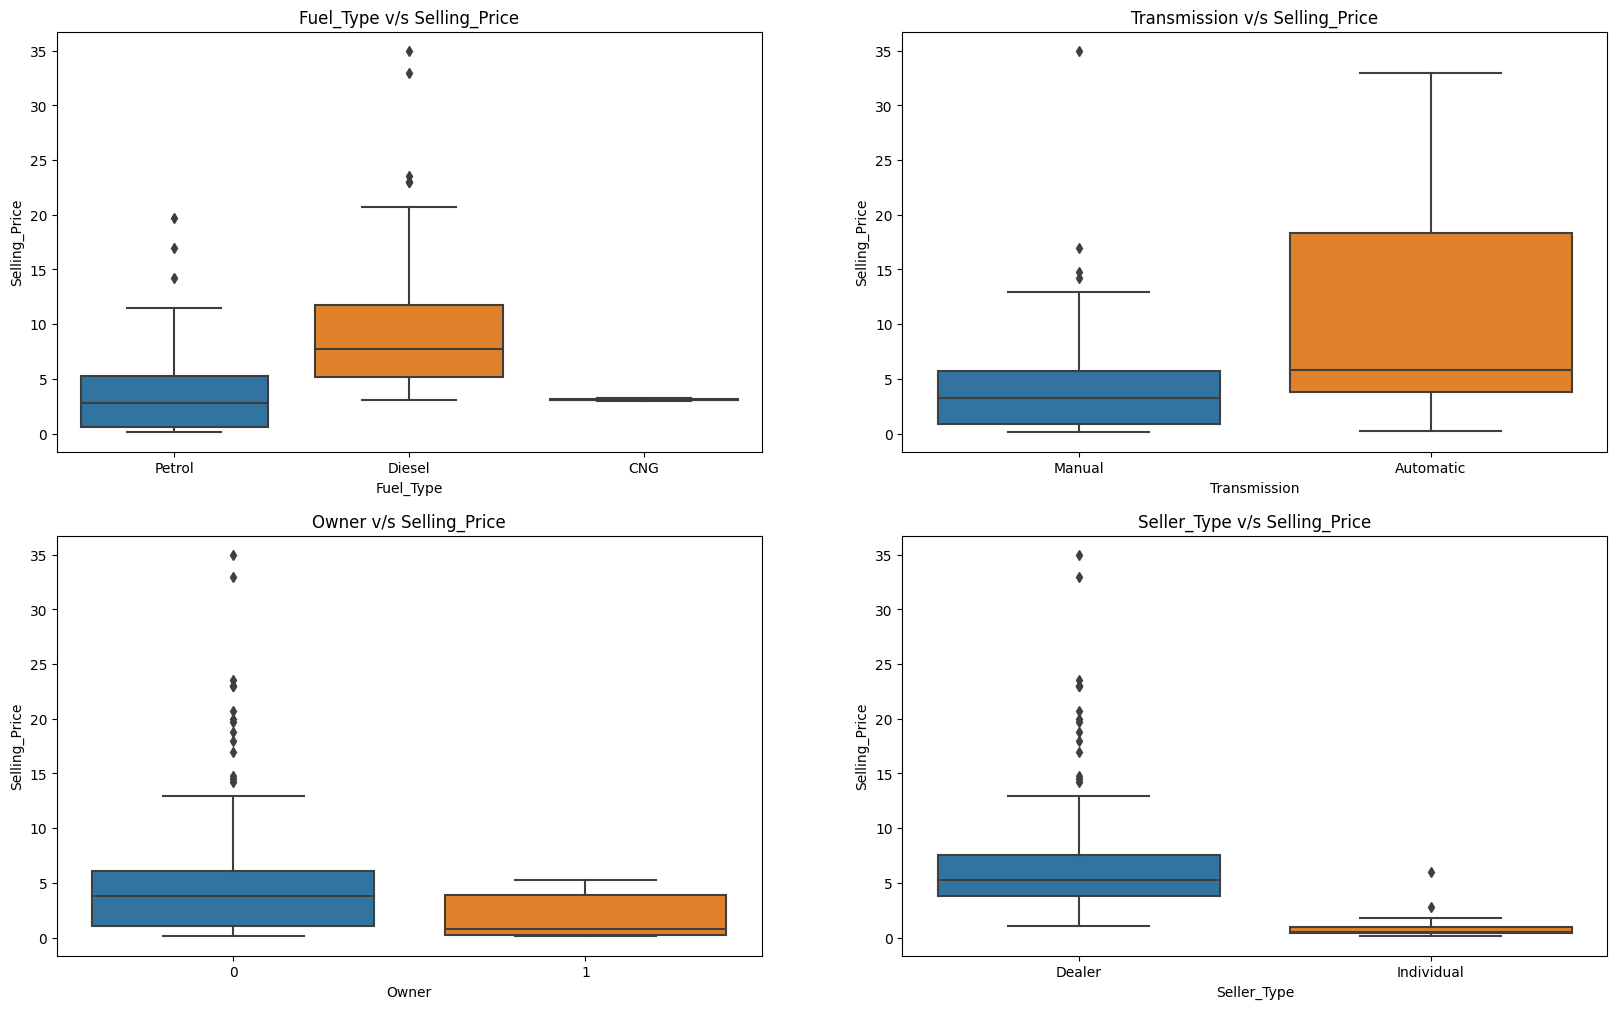

In [29]:
fig,axes = plt.subplots(2,2,figsize=(20,12))

sns.boxplot(x=cars.Fuel_Type,y=cars.Selling_Price,ax=axes[0][0])
axes[0][0].set_title('Fuel_Type v/s Selling_Price')

sns.boxplot(x=cars.Transmission,y=cars.Selling_Price,ax=axes[0][1])
axes[0][1].set_title('Transmission v/s Selling_Price')

sns.boxplot(x=cars.Owner,y=cars.Selling_Price,ax=axes[1][0])
axes[1][0].set_title('Owner v/s Selling_Price')

sns.boxplot(x=cars.Seller_Type,y=cars.Selling_Price,ax=axes[1][1])
axes[1][1].set_title('Seller_Type v/s Selling_Price')

In [ ]:
# 1.The Diesel cars are having the highest selling_price with most number of outliers being present. Diesel > CNG > Petrol in terms of seeling price
# 2.Automatic cars are expesnive than manual cars
#3. The cars with no previous owner are expensive than with a previous owner.
#4. Individuals are selling there cars at lesser price than the cars being sold by the dealers

In [ ]:
# Multivariate Analysis

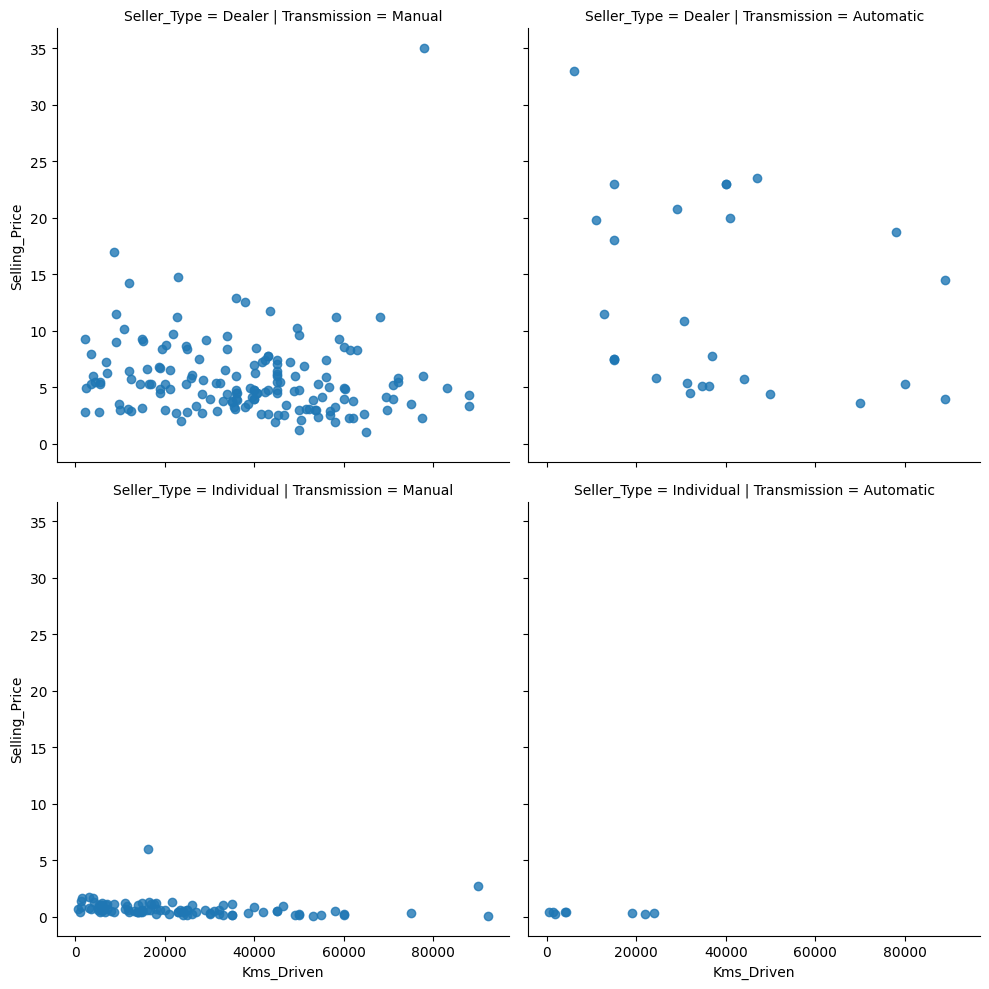

In [30]:
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=cars,fit_reg=False,col='Transmission',row='Seller_Type')   
plt.show()

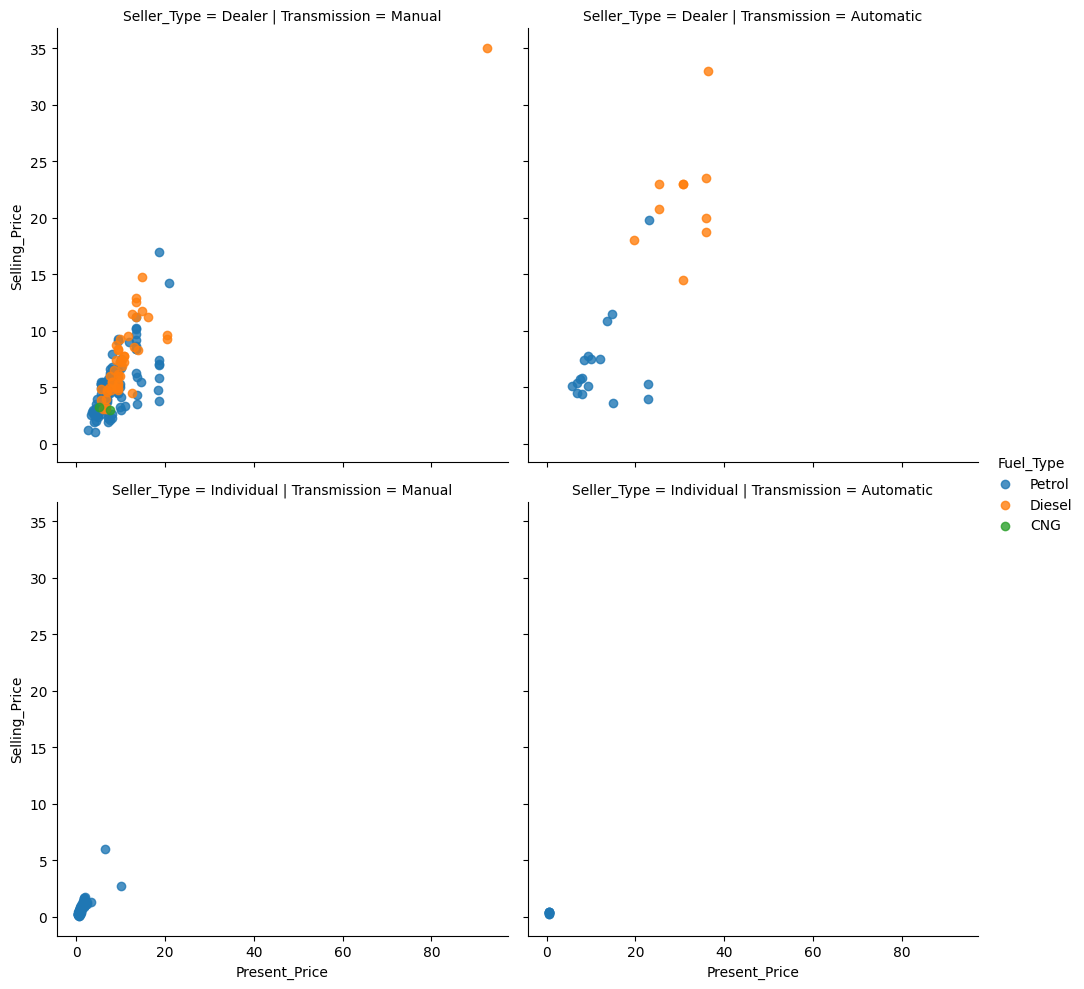

In [31]:
sns.lmplot(x='Present_Price',y='Selling_Price',data=cars,fit_reg=False,col='Transmission',row='Seller_Type',hue='Fuel_Type')   
plt.show()

In [ ]:
# 1.All the individual seller_type are having only petrol cars.
# 2. Dealers selling manual transmission cars are selling all the 3 types of fuel cars, most expensive being the diesel cars

In [ ]:
       #Converting categorical variables to dummy variables

In [32]:
#Fuel_Type

cars.Fuel_Type.value_counts()

Petrol    234
Diesel     57
CNG         2
Name: Fuel_Type, dtype: int64

In [33]:
cars.Seller_Type.value_counts()

Dealer        192
Individual    101
Name: Seller_Type, dtype: int64

In [34]:
cars.Transmission.value_counts()

Manual       258
Automatic     35
Name: Transmission, dtype: int64

In [35]:
cars = pd.get_dummies(cars,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [36]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    293 non-null    int64  
 1   Selling_Price           293 non-null    float64
 2   Present_Price           293 non-null    float64
 3   Kms_Driven              293 non-null    int64  
 4   Owner                   293 non-null    int64  
 5   Fuel_Type_Diesel        293 non-null    uint8  
 6   Fuel_Type_Petrol        293 non-null    uint8  
 7   Seller_Type_Individual  293 non-null    uint8  
 8   Transmission_Manual     293 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 23.0 KB


In [37]:
cars.shape

(293, 9)

In [38]:
cars.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


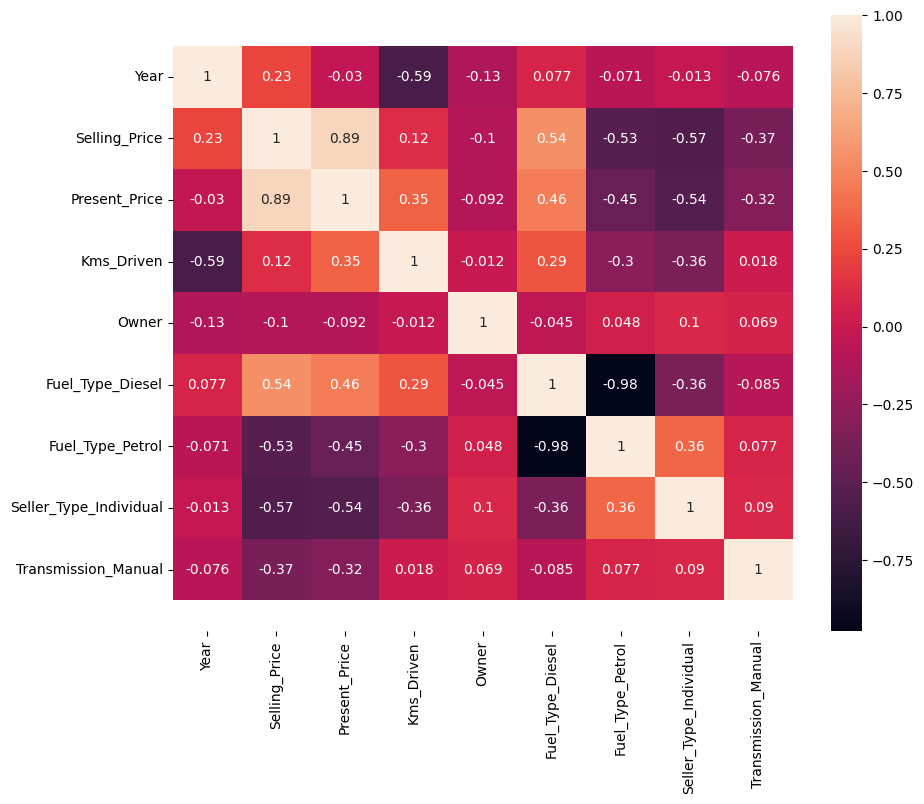

In [39]:
#Heatmap to show the correlation between various variables of the dataset

plt.figure(figsize=(10, 8))
cor = cars.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

The target variable Selling Price is highly correlated with:

   1.Present Price
   2.Fuel Type
   3.Seller Type

The algorithms we plan to use are:

Linear Regression

Random Forest Regression

Gradient Boosting Regression

In phase 2, we may incorporate deep learning algorithms such as neural networks if they prove to be effective for this dataset.